In [1]:
from IPython.display import Image, display

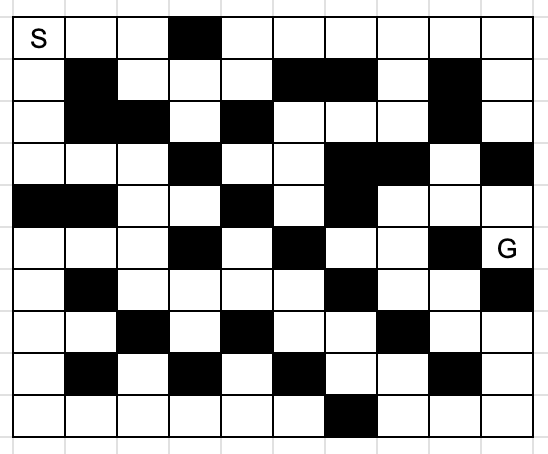

28


In [2]:
# 迷路の探索(番兵)
display(Image(filename='work/image/meiro.png'))

# 黒を壁、白が通路でS->Gへのルートをを探す
# 番兵を使用して、迷路の周りに仮想の壁を作成し、探索条件を簡単にする

maze = [
    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
    [9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9],
    [9, 0, 9, 0, 0, 0, 9, 9, 0, 9, 9, 9],
    [9, 0, 9, 9, 0, 9, 0, 0, 0, 9, 0, 9],
    [9, 0, 0, 0, 9, 0, 0, 9, 9, 0, 9, 9],
    [9, 9, 9, 0, 0, 9, 0, 9, 0, 0, 0, 9],
    [9, 0, 0, 0, 9, 0, 9, 0, 0, 9, 1, 9],
    [9, 0, 9, 0, 0, 0, 0, 9, 0, 0, 9, 9],
    [9, 0, 0, 9, 0, 9, 0, 0, 9, 0, 0, 9],
    [9, 0, 9, 0, 9, 0, 9, 0, 0, 9, 0, 9],
    [9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9],
    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
]

# 壁を9 道を0 ゴールを1として、探索済みの道を2で上書きを行うこととする
# ゴールをするか進めなくなるまで探索することとする。

# 幅優先探索での解
pos = [[1, 1, 0]] # x座標 y座標 移動回数
goal = 1
wall = 9
road = 0
explored = 2

while len(pos) > 0:
    x, y, count = pos.pop(0)
    
    # ゴール判定
    if maze[x][y] == goal:
        print(count)
        break
    
    # 現在地を探索済みとする
    maze[x][y] = explored
    
    # 上
    if maze[x][y - 1] < explored:
        pos.append([x, y - 1, count + 1])
    # 下
    if maze[x][y + 1] < explored:
        pos.append([x, y + 1, count + 1])
    # 左
    if maze[x - 1][y] < explored:
        pos.append([x - 1, y, count + 1])
    # 右
    if maze[x + 1][y] < explored:
        pos.append([x + 1, y, count + 1])
    

In [3]:
maze = [
    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
    [9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9],
    [9, 0, 9, 0, 0, 0, 9, 9, 0, 9, 9, 9],
    [9, 0, 9, 9, 0, 9, 0, 0, 0, 9, 0, 9],
    [9, 0, 0, 0, 9, 0, 0, 9, 9, 0, 9, 9],
    [9, 9, 9, 0, 0, 9, 0, 9, 0, 0, 0, 9],
    [9, 0, 0, 0, 9, 0, 9, 0, 0, 9, 1, 9],
    [9, 0, 9, 0, 0, 0, 0, 9, 0, 0, 9, 9],
    [9, 0, 0, 9, 0, 9, 0, 0, 9, 0, 0, 9],
    [9, 0, 9, 0, 9, 0, 9, 0, 0, 9, 0, 9],
    [9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9],
    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
]

# 深さ優先探索の解(再帰)
def search(x, y, count):
    goal = 1
    wall = 9
    road = 0
    explored = 2
    
    if maze[x][y] == goal:
        print(count)
        return
        
    maze[x][y] = explored
    
    # 上
    if maze[x][y - 1] < explored:
        search(x, y - 1, count + 1)
    # 下
    if maze[x][y + 1] < explored:
        search(x, y + 1, count + 1)
    # 左
    if maze[x - 1][y] < explored:
        search(x - 1, y, count + 1)
    # 右
    if maze[x + 1][y] < explored:
        search(x + 1, y, count + 1)
    
    # 探索前に戻す
    maze[x][y] = 0
    
search(1, 1, 0)

28


In [8]:
# 右手法
# 迷路の右側の壁に沿って移動し、進めなくなったら、向きを左に変えてゴールまで探索する

maze = [
    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
    [9, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 9],
    [9, 0, 9, 0, 0, 0, 9, 9, 0, 9, 9, 9],
    [9, 0, 9, 9, 0, 9, 0, 0, 0, 9, 0, 9],
    [9, 0, 0, 0, 9, 0, 0, 9, 9, 0, 9, 9],
    [9, 9, 9, 0, 0, 9, 0, 9, 0, 0, 0, 9],
    [9, 0, 0, 0, 9, 0, 9, 0, 0, 9, 1, 9],
    [9, 0, 9, 0, 0, 0, 0, 9, 0, 0, 9, 9],
    [9, 0, 0, 9, 0, 9, 0, 0, 9, 0, 0, 9],
    [9, 0, 9, 0, 9, 0, 9, 0, 0, 9, 0, 9],
    [9, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 9],
    [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
]

dir = [[1, 0], [0, 1], [-1, 0], [0, -1]]

# xy座標、移動回数、方向
x, y, count, d = 1, 1, 0, 0

goal = 1
wall = 9
road = 0
explored = 2
    
while maze[x][y] != goal:
    # 探索済みとする
    maze[x][y] = 2
    
    # 右手法で探索
    for i in range(len(dir)):
        # 進行方向の右側から順に探す
        j = (d + i -1) % len(dir)
        # i = 0 のとき、j = (0 + 0 - 1) % 4 = 3
	    # i = 1 のとき、j = (0 + 1 - 1) % 4 = 0
	    # i = 2 のとき、j = (0 + 2 - 1) % 4 = 1
	    # i = 3 のとき、j = (0 + 3 - 1) % 4 = 2
        if maze[x + dir[j][0]][y + dir[j][1]] < 2:
            x += dir[j][0]
            y += dir[j][1]
            d = j
            count += 1
            break
        elif maze[x + dir[j][0]][y + dir[j][1]] == explored:
            # 訪問図もの場合は進めて移動回数を減らす
            x += dir[j][0]
            y += dir[j][1]
            d = j
            count -= 1
            break
        
print(count)
        

j3 index 0
j0 index 1
j3 index 0
j0 index 1
j3 index 0
j0 index 1
j3 index 0
j0 index 1
j1 index 2
j0 index 0
j1 index 1
j0 index 0
j3 index 0
j0 index 1
j3 index 0
j2 index 0
j3 index 1
j2 index 0
j3 index 1
j0 index 2
j3 index 0
j0 index 1
j3 index 0
j0 index 1
j3 index 0
j0 index 1
j3 index 0
j0 index 1
j1 index 2
j0 index 0
j1 index 1
j0 index 0
j1 index 1
j0 index 0
j1 index 1
j0 index 0
j1 index 1
j0 index 0
j1 index 1
j2 index 2
j3 index 3
j2 index 0
j1 index 0
j2 index 1
j3 index 2
j0 index 3
j3 index 0
j2 index 0
j3 index 1
j2 index 0
j1 index 0
j2 index 1
j3 index 2
j0 index 3
j3 index 0
j2 index 0
j3 index 1
j2 index 0
j1 index 0
j2 index 1
j1 index 0
j0 index 0
j1 index 1
j2 index 2
j3 index 3
j2 index 0
j1 index 0
j2 index 1
j1 index 0
j0 index 0
j1 index 1
j0 index 0
j3 index 0
j0 index 1
j1 index 2
j0 index 0
j3 index 0
j0 index 1
j1 index 2
j2 index 3
j1 index 0
j0 index 0
j1 index 1
j0 index 0
j3 index 0
j0 index 1
j1 index 2
j0 index 0
j3 index 0
j0 index 1
j1 index 2